In [15]:
# Read data
import pandas as pd

data=pd.read_csv('../data/data.csv')
data=data[data['birth_date'].str.len()==10]
data['birth_date'] = pd.to_datetime(data['birth_date'], errors='coerce')
data.head()

C:\Users\Ojas\AppData\Local\Temp\ipykernel_12548\3718585779.py:4: DtypeWarning: Columns (18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,gender,id,identifiers,image,images,name,birth_date,links,other_names,...,contact_details,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name
8,8,male,34352d83-6fa1-463d-a02f-6157b3adf36b,"[{'identifier': '141', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/bfe/u...,[{'url': 'http://www.parlamentra.org/upload/ib...,Убирия Бежан Михайлович,1967-03-07,"[{'note': 'Wikipedia (ru)', 'url': 'https://ru...","[{'name': 'Бежан Убириа', 'note': 'alternate'}...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,male,9fd33b27-fd4c-4eba-9a8f-d4d23f603c63,"[{'identifier': '/m/03fqqs', 'scheme': 'freeba...",http://www.parlamentra.org/upload/iblock/e1f/s...,[{'url': 'http://www.parlamentra.org/upload/ib...,Шамба Сергей Миронович,1951-03-15,"[{'note': 'Wikipedia (ab)', 'url': 'https://ab...","[{'lang': 'ab', 'name': 'Сергеи Шамба', 'note'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,male,da988bab-32d4-46c0-bb7b-5c6a6eb129e7,"[{'identifier': '46', 'scheme': 'everypolitici...",http://www.parlamentra.org/upload/iblock/b85/%...,[{'url': 'http://www.parlamentra.org/upload/ib...,Бганба Валерий Рамшухович,1953-08-26,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'cs', 'name': 'Valerij Bganba', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,78,female,522dff9d-d21d-41b9-a7d5-c2321c819b11,"[{'identifier': '1854', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/fa...,[{'url': 'http://www.wolesi.website/Media/Imag...,Farkhunda Zahra Naderi-Kabul,1981-04-19,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'en', 'name': 'Farkhunda Zahra Nader...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,172,female,aac6f415-446d-4070-80d9-195d4f7b77ac,"[{'identifier': '1823', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/ra...,[{'url': 'http://www.wolesi.website/Media/Imag...,Rangina Kargar-Faryab,1985-03-22,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'en', 'name': 'Rangina Kargar', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Full moon data for 1900-2050. 
full_moon_dates = pd.read_csv('../data/full_moon.csv')
full_moon_dates[' Date'] = pd.to_datetime(full_moon_dates[' Date'], errors='coerce')
full_moon_dates

,Day,Date,Time
0,Monday,1900-01-15,08:07:30 pm
1,Wednesday,1900-02-14,02:50:12 pm
2,Friday,1900-03-16,09:11:48 am
3,Sunday,1900-04-15,02:02:06 am
4,Monday,1900-05-14,04:36:36 pm
...,...,...,...
1863,Thursday,2050-09-01,10:30:54 am
1864,Friday,2050-09-30,06:31:48 pm
1865,Sunday,2050-10-30,04:16:00 am
1866,Monday,2050-11-28,04:09:48 pm


In [17]:
# Add a column to data that indicates whether the person was born on a full moon

data['full_moon'] = data['birth_date'].isin(full_moon_dates[' Date'])
data['full_moon'].value_counts()

False    42543
True      1432
Name: full_moon, dtype: int64

This is very close to the expected ratio, so being born on a full moon does not seem to make a difference.

In [21]:
# Add a column to data that indicates the closest full moon date to the person's birth date
data['closest_full_moon'] = data['birth_date'].apply(lambda x: full_moon_dates[' Date'][full_moon_dates[' Date']<x].max())

# Add a column to data that indicates the number of days between  birth date and the closest full moon i.e. moon phase.
data['moon_phase']=(data['birth_date']-data['closest_full_moon']).dt.days
data[['birth_date','closest_full_moon','moon_phase']].head()

,birth_date,closest_full_moon,moon_phase
8,1967-03-07,1967-02-24,11.0
19,1951-03-15,1951-02-21,22.0
28,1953-08-26,1953-08-24,2.0
113,1981-04-19,1981-03-20,30.0
207,1985-03-22,1985-03-07,15.0


In [19]:
moon_df=pd.DataFrame(data['moon_phase'].value_counts()).sort_index()
moon_df['percentage']=moon_df['moon_phase']/moon_df['moon_phase'].sum()
moon_df

,moon_phase,percentage
1.0,1464,0.033987
2.0,1465,0.034010
3.0,1467,0.034057
4.0,1398,0.032455
5.0,1465,0.034010
6.0,1489,0.034568
7.0,1415,0.032850
8.0,1418,0.032919
9.0,1507,0.034985
10.0,1497,0.034753


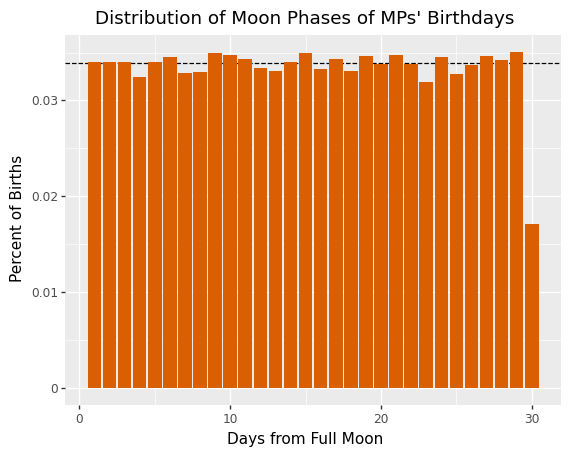

<ggplot: (153171634053)>

In [20]:
# Plot the distribution of moon phases

from plotnine import *
(ggplot(moon_df.reset_index(), aes(x='index', y='percentage')) 
 + geom_hline(yintercept=1/29.53, color='black', linetype='dashed')
 + geom_bar(stat='identity', fill='#d95f02') 
 + xlab('Days from Full Moon') 
 + ylab('Percent of Births') 
 + ggtitle("Distribution of Moon Phases of MPs' Birthdays"))

There seems to be no significant trend in the moon phase of MPs' birthdays. The value for 30 is about half the magnitude of the others, but this is as expected since the lunar cycle is 29.53 days long.